<h4>Libraries</<h4>

In [51]:
import numpy as np
import pandas as pd
import scipy
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

<h4>Import data</h4>

In [52]:
ticket = yf.Ticker('EURUSD=X')
dataset = ticket.history(period='max', interval='1d', auto_adjust=True).drop(columns=['Volume', 'Dividends', 'Stock Splits']).rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close'}).round(5)
dataset['date'] = dataset.index
dataset.reset_index(drop=True, inplace=True)
dataset

,open,high,low,close,date
0,1.20340,1.20401,1.19440,1.19650,2003-12-01
1,1.19610,1.21090,1.19460,1.20890,2003-12-02
2,1.20900,1.21300,1.20770,1.21230,2003-12-03
3,1.21200,1.21440,1.20440,1.20809,2003-12-04
4,1.20780,1.21910,1.20659,1.21869,2003-12-05
...,...,...,...,...,...
4731,1.11811,1.12445,1.11432,1.11811,2022-02-28
4732,1.12147,1.12322,1.11021,1.12159,2022-03-01
4733,1.11310,1.11419,1.10585,1.11328,2022-03-02
4734,1.11136,1.11161,1.10398,1.11123,2022-03-03


<h4>Explore the data</h4>

In [53]:
print(dataset.describe(), '\n')
print(dataset.info(), '\n')
print(dataset.dtypes, '\n')

              open         high          low        close
count  4736.000000  4736.000000  4736.000000  4736.000000
mean      1.254278     1.258960     1.249141     1.254301
std       0.119083     0.119850     0.119635     0.119077
min       1.039390     1.041990     0.072900     1.039050
25%       1.148825     1.153055     1.143903     1.149040
50%       1.243945     1.248675     1.238650     1.243950
75%       1.338785     1.343290     1.333720     1.338952
max       1.598180     1.602820     1.587400     1.598800 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4736 entries, 0 to 4735
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   open    4736 non-null   float64       
 1   high    4736 non-null   float64       
 2   low     4736 non-null   float64       
 3   close   4736 non-null   float64       
 4   date    4736 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 185.1 KB
N

<h4>Correlation Estimate</h4>

In [54]:
dataset.corr()

,open,high,low,close
open,1.000000,0.999238,0.980407,0.999063
high,0.999238,1.000000,0.979909,0.999232
low,0.980407,0.979909,1.000000,0.980422
close,0.999063,0.999232,0.980422,1.000000


<h4>Visualize the Raw data</h4>

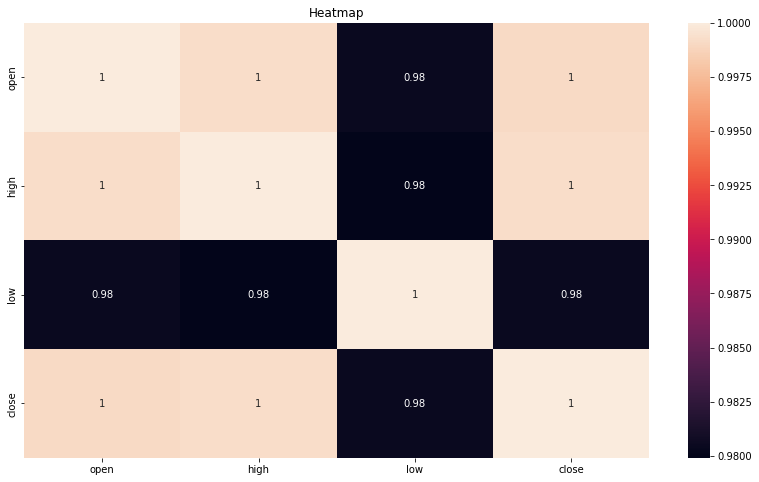

In [55]:
plt.figure(figsize=(14, 8))
sns.heatmap(dataset.corr(), annot=True)
plt.title('Heatmap')
plt.show()

<h4>Create filter</h4>

In [59]:
print(dataset.iloc[:-1, :])
dataset['MA'] = dataset['close'].rolling(window=21).mean()
dataset.loc[dataset['open'] > dataset['MA']]

         open     high      low    close       date
0     1.20340  1.20401  1.19440  1.19650 2003-12-01
1     1.19610  1.21090  1.19460  1.20890 2003-12-02
2     1.20900  1.21300  1.20770  1.21230 2003-12-03
3     1.21200  1.21440  1.20440  1.20809 2003-12-04
4     1.20780  1.21910  1.20659  1.21869 2003-12-05
...       ...      ...      ...      ...        ...
4730  1.11908  1.12661  1.11681  1.11907 2022-02-25
4731  1.11811  1.12445  1.11432  1.11811 2022-02-28
4732  1.12147  1.12322  1.11021  1.12159 2022-03-01
4733  1.11310  1.11419  1.10585  1.11328 2022-03-02
4734  1.11136  1.11161  1.10398  1.11123 2022-03-03

[4735 rows x 5 columns]


,open,high,low,close,date,MA
20,1.24339,1.25080,1.24299,1.24839,2003-12-29,1.228935
21,1.24860,1.25630,1.24830,1.25489,2003-12-30,1.231715
22,1.25500,1.26489,1.25301,1.25900,2003-12-31,1.234101
23,1.25900,1.26080,1.24740,1.25819,2004-01-01,1.236286
24,1.25819,1.26280,1.25269,1.25819,2004-01-02,1.238672
...,...,...,...,...,...,...
4720,1.14117,1.14190,1.13713,1.14155,2022-02-11,1.134161
4721,1.13658,1.13689,1.12928,1.13651,2022-02-14,1.133723
4723,1.13556,1.13932,1.13455,1.13568,2022-02-16,1.132970
4724,1.13733,1.13869,1.13276,1.13753,2022-02-17,1.133188


<h4>Group By</h4>

In [61]:
print(dataset.groupby('close').mean())

            open     high      low        MA
close                                       
1.03905  1.03939  1.04515  1.03853  1.058660
1.04058  1.04047  1.04199  1.03552  1.059843
1.04170  1.04178  1.04910  1.04178  1.054062
1.04188  1.04178  1.04723  1.04037  1.061517
1.04199  1.04184  1.04789  1.03913  1.051147
...          ...      ...      ...       ...
1.59119  1.58040  1.59431  1.57988  1.575100
1.59139  1.58341  1.59309  1.58321  1.574774
1.59490  1.57871  1.59490  1.57679  1.563527
1.59581  1.57841  1.59760  1.57801  1.571249
1.59880  1.59114  1.60131  1.58431  1.576486

[3866 rows x 4 columns]


<h4>Outliers</h4>

No handles with labels found to put in legend.


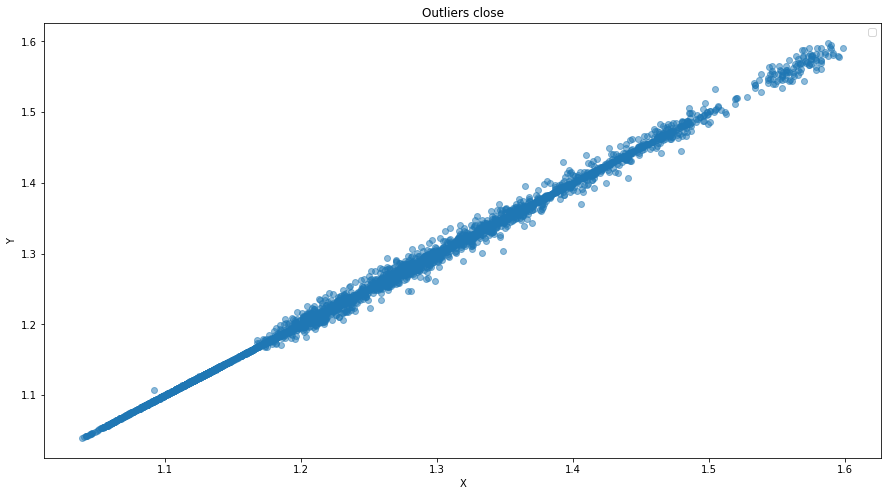

In [70]:
x = dataset['close']
y = dataset['open']
plt.figure(figsize=(15, 8))
plt.scatter(x, y, alpha=0.5)
plt.xlabel("close")
plt.ylabel("open")
plt.legend()
plt.title('Outliers close')
plt.show()


